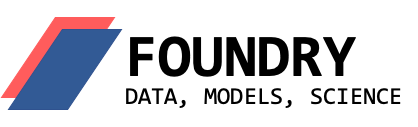

# Foundry Atom Position Finding Tutorial for Beginners
This introduction uses Foundry to:


1.   Load data from Foundry
2.   Visualize data inputs and outputs

This notebook is set up to run as a [Google Colaboratory](https://colab.research.google.com/notebooks/intro.ipynb#scrollTo=5fCEDCU_qrC0) notebook, which allows you to run python code in the browser, or as a [Jupyter](https://jupyter.org/) notebook, which runs locally on your machine.

The code in the next cell will detect your environment to make sure that only cells that match your environment will run.

In [ ]:
try:
  import google.colab
  no_local_server=True
  no_browser=True
  globus=False
except: # when not in google colab
  no_local_server=False
  no_browser=False
  globus=True

# Installing Foundry
First we'll need to install Foundry. We'll also be installing [Matplotlib](https://matplotlib.org/) for our visualizations.

In [ ]:
!pip install foundry_ml
!pip install matplotlib

If you're running this notebook in Google Colab, you'll also need to install these versions of pandas and tables, since Colab keeps their versions of these a few behind.

In [ ]:
!pip install pandas==1.2.2 tables==3.6.1

# Importing Packages
Now we can import Foundry and Matplotlib so we can import the data and visualize it.

In [ ]:
from foundry import Foundry
import matplotlib.pyplot as plt 

# Instantiating Foundry
To instantiate Foundry, you'll need a [Globus](https://www.globus.org) account. Once you have your account, you can instantiate Foundry using the code below. When you instantiate Foundry locally, be sure to have your Globus endpoint turned on (you can do that with [Globus Connect Personal](https://www.globus.org/globus-connect-personal)). When you instantiate Foundry on Google Colab, you'll be given a link in the cell's output and asked to enter the provided auth code.

In [ ]:
f = Foundry(index="mdf", no_local_server=no_local_server, no_browser=no_browser)

Please paste the following URL in a browser:
https://auth.globus.org/v2/oauth2/authorize?client_id=984464e2-90ab-433d-8145-ac0215d26c8e&redirect_uri=https%3A%2F%2Fauth.globus.org%2Fv2%2Fweb%2Fauth-code&scope=urn%3Aglobus%3Aauth%3Ascope%3Adata.materialsdatafacility.org%3Aall+https%3A%2F%2Fauth.globus.org%2Fscopes%2Fc17f27bb-f200-486a-b785-2a25e82af505%2Fconnect+urn%3Aglobus%3Aauth%3Ascope%3Asearch.api.globus.org%3Asearch+https%3A%2F%2Fauth.globus.org%2Fscopes%2F56ceac29-e98a-440a-a594-b41e7a084b62%2Fall+urn%3Aglobus%3Aauth%3Ascope%3Atransfer.api.globus.org%3Aall+https%3A%2F%2Fauth.globus.org%2Fscopes%2F81fc4156-a623-47f2-93ad-7184118226ba%2Fauth+openid+https%3A%2F%2Fauth.globus.org%2Fscopes%2Ffacd7ccc-c5f4-42aa-916b-a0e270e2c2a9%2Fall&state=_default&response_type=code&code_challenge=J56GKqKIKvKMP1a_VZr0SDHqOizXWlraUYOeMr0WtoI&code_challenge_method=S256&access_type=offline&prefill_named_grant=Foundry+Login
Please Paste your Auth Code Below: 
2mZ86aeEOYJSCn4nqJHd5bTNFLbjac


In [ ]:
dataset_doi = '10.18126/e73h-3w6n'

f.load(dataset_doi, download=True, globus=globus)

Done curling.
[{'/foundry/foundry_wei_atom_locating_benchmark_v1.1/wei_atom.h5 status': True}, {'/foundry/foundry_wei_atom_locating_benchmark_v1.1/wei_atom_bak.h5 status': True}]


Foundry(dc={'creators': [{'affiliations': ['University of Wisconsin - Madison'], 'creatorName': 'Wei, Jingrui', 'familyName': 'Wei', 'givenName': 'Jingrui'}, {'affiliations': ['University of Chicago', 'Argonne National Laboratory'], 'creatorName': 'Blaiszik, Ben', 'familyName': 'Blaiszik', 'givenName': 'Ben'}, {'affiliations': ['University of Wisconsin - Madison'], 'creatorName': 'Morgan, Dane', 'familyName': 'Morgan', 'givenName': 'Dane'}, {'affiliations': ['University of Wisconsin - Madison'], 'creatorName': 'Voyles, Paul', 'familyName': 'Voyles', 'givenName': 'Paul'}], 'dates': [{'date': '2021-07-15', 'dateType': 'Accepted'}], 'identifier': {'identifier': '10.18126/e73h-3w6n', 'identifierType': 'DOI'}, 'publicationYear': 2021, 'publisher': 'Materials Data Facility', 'resourceType': {'resourceType': 'Dataset', 'resourceTypeGeneral': 'Dataset'}, 'subjects': [{'subject': 'machine learning'}, {'subject': 'foundry'}, {'subject': 'atom finding'}, {'subject': 'materials'}, {'subject': 'STEM'}], 'titles': [{'title': 'Benchmark Dataset for Locating Atoms in STEM images'}]}, mdf={'ingest_date': '2021-07-15T14:24:40.739344Z', 'organizations': ['Foundry'], 'resource_type': 'dataset', 'scroll_id': 0, 'source_id': 'foundry_wei_atom_locating_benchmark_v1.1', 'source_name': 'foundry_wei_atom_locating_benchmark', 'version': 1}, dataset=FoundryDataset(keys=[FoundryKey(key=['imgs'], type='input', filter='', units='', description='input, unlabeled images', classes=None), FoundryKey(key=['raw'], type='input', filter='', units='', description='raw, unlabeled images', classes=None), FoundryKey(key=['metadata'], type='input', filter='', units='', description='tabular information describing the experimental conditions and materials for each image', classes=None), FoundryKey(key=['coords'], type='target', filter='', units='', description='(x,y) coordinates for labeled atoms for each image', classes=None)], splits=[FoundrySplit(type='train', path='wei_atom.h5', label='train')], data_type=<FoundryDatasetType.hdf5: 'hdf5'>, short_name='wei_atom_locating', dataframe=None, task_type=['supervised'], domain=['materials science'], n_items=299), config=FoundryConfig(dataframe_file='foundry_dataframe.json', data_file='foundry.hdf5', metadata_file='foundry_metadata.json', destination_endpoint=None, local=False, metadata_key='foundry', organization='foundry', local_cache_dir='./data'), forge_client=<mdf_forge.forge.Forge object at 0x7fe98d8adb10>, connect_client=<mdf_connect_client.mdfcc.MDFConnectClient object at 0x7fe98d8adad0>, xtract_tokens={'auth_token': 'Agmg1XOne9kJb1ykEDXb31VQJwP6BKoMYW6pQX2NlowezyxzoyS8C1ldODkowOqbbe0beDJEPgq5qph8gjYzQU6J9o', 'transfer_token': 'AgODExlz2gybWl6BQK0Dbqpn3qygavWE7a0NrP2dq29mN9WQrmTnCnqyWJp0EzeBMv0z8OQ4d3zexace7pob6TvmvP', 'funcx_token': 'AgkqxqzDmEzxjdkyyymOEGE4vakNJzna091z2lnQ86Q9JQxvJBTOCqQ98WeYjD9qKVmpxgXgMjDenMHjyVWaEceneo'}, index='mdf')

In [ ]:
res = f.load_data()

In [ ]:
imgs = res['train']['input']['imgs']
desc = res['train']['input']['metadata']
coords = res['train']['target']['coords']

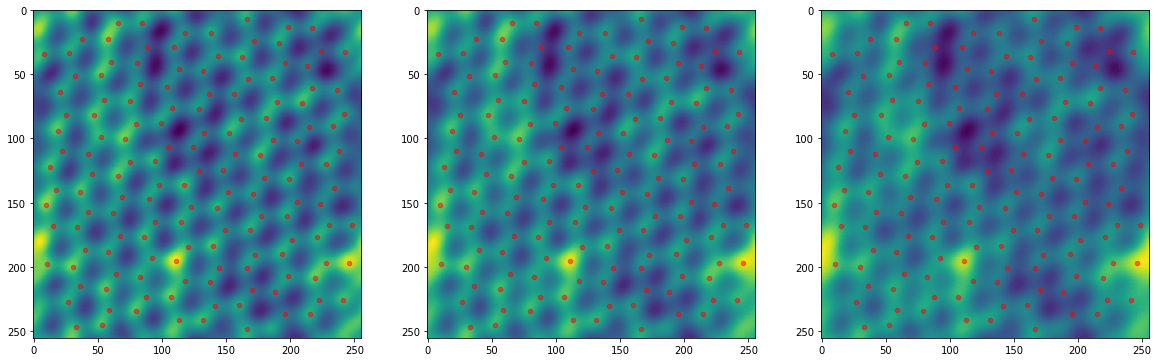

In [ ]:
n_images = 3
offset = 150
key_list = list(res['train']['input']['imgs'].keys())[0+offset:n_images+offset]

fig, axs = plt.subplots(1, n_images, figsize=(20,20))
for i in range(n_images):
    axs[i].imshow(imgs[key_list[i]])
    axs[i].scatter(coords[key_list[i]][:,0], coords[key_list[i]][:,1], s = 20, c = 'r', alpha=0.5)